In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import warnings

In [2]:
warnings.filterwarnings("ignore")

# VISUALIZING DATASETS

In [3]:
a=pd.read_csv("C:\\Users\\sowmy\\Downloads\\admission.csv")

In [4]:
df=pd.DataFrame(a)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# Visualize FIrst 10 random rows of the data set

df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# a) Visualize the 10 random rows of the data set

In [7]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
322,323,314,107,2,2.5,4.0,8.27,0,0.72
301,302,319,108,2,2.5,3.0,8.76,0,0.66
306,307,323,110,3,4.0,3.5,9.10,1,0.79
395,396,324,110,3,3.5,3.5,9.04,1,0.82
281,282,317,110,3,4.0,4.5,9.11,1,0.80
87,88,317,107,2,3.5,3.0,8.28,0,0.66
236,237,325,112,4,4.0,4.5,9.17,1,0.85
110,111,305,108,5,3.0,3.0,8.48,0,0.61
160,161,315,103,1,1.5,2.0,7.86,0,0.57
188,189,331,115,5,4.5,3.5,9.36,1,0.93


# b) Generate the description for numeric variables


In [8]:
df.describe().style.background_gradient(cmap="seismic")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.484000,8.576440,0.560000,0.721740
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.925450,0.604813,0.496884,0.141140
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# c) Check the shape of the data set

In [9]:
df.shape

(500, 9)

# d) Generate the correlation matrix

In [10]:
df.corr().style.background_gradient(cmap="rainbow")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

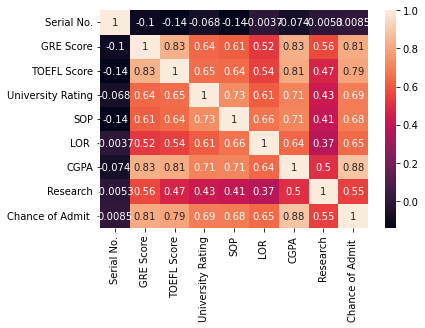

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
df.duplicated().sum()

0

# e) Generate a correlogram

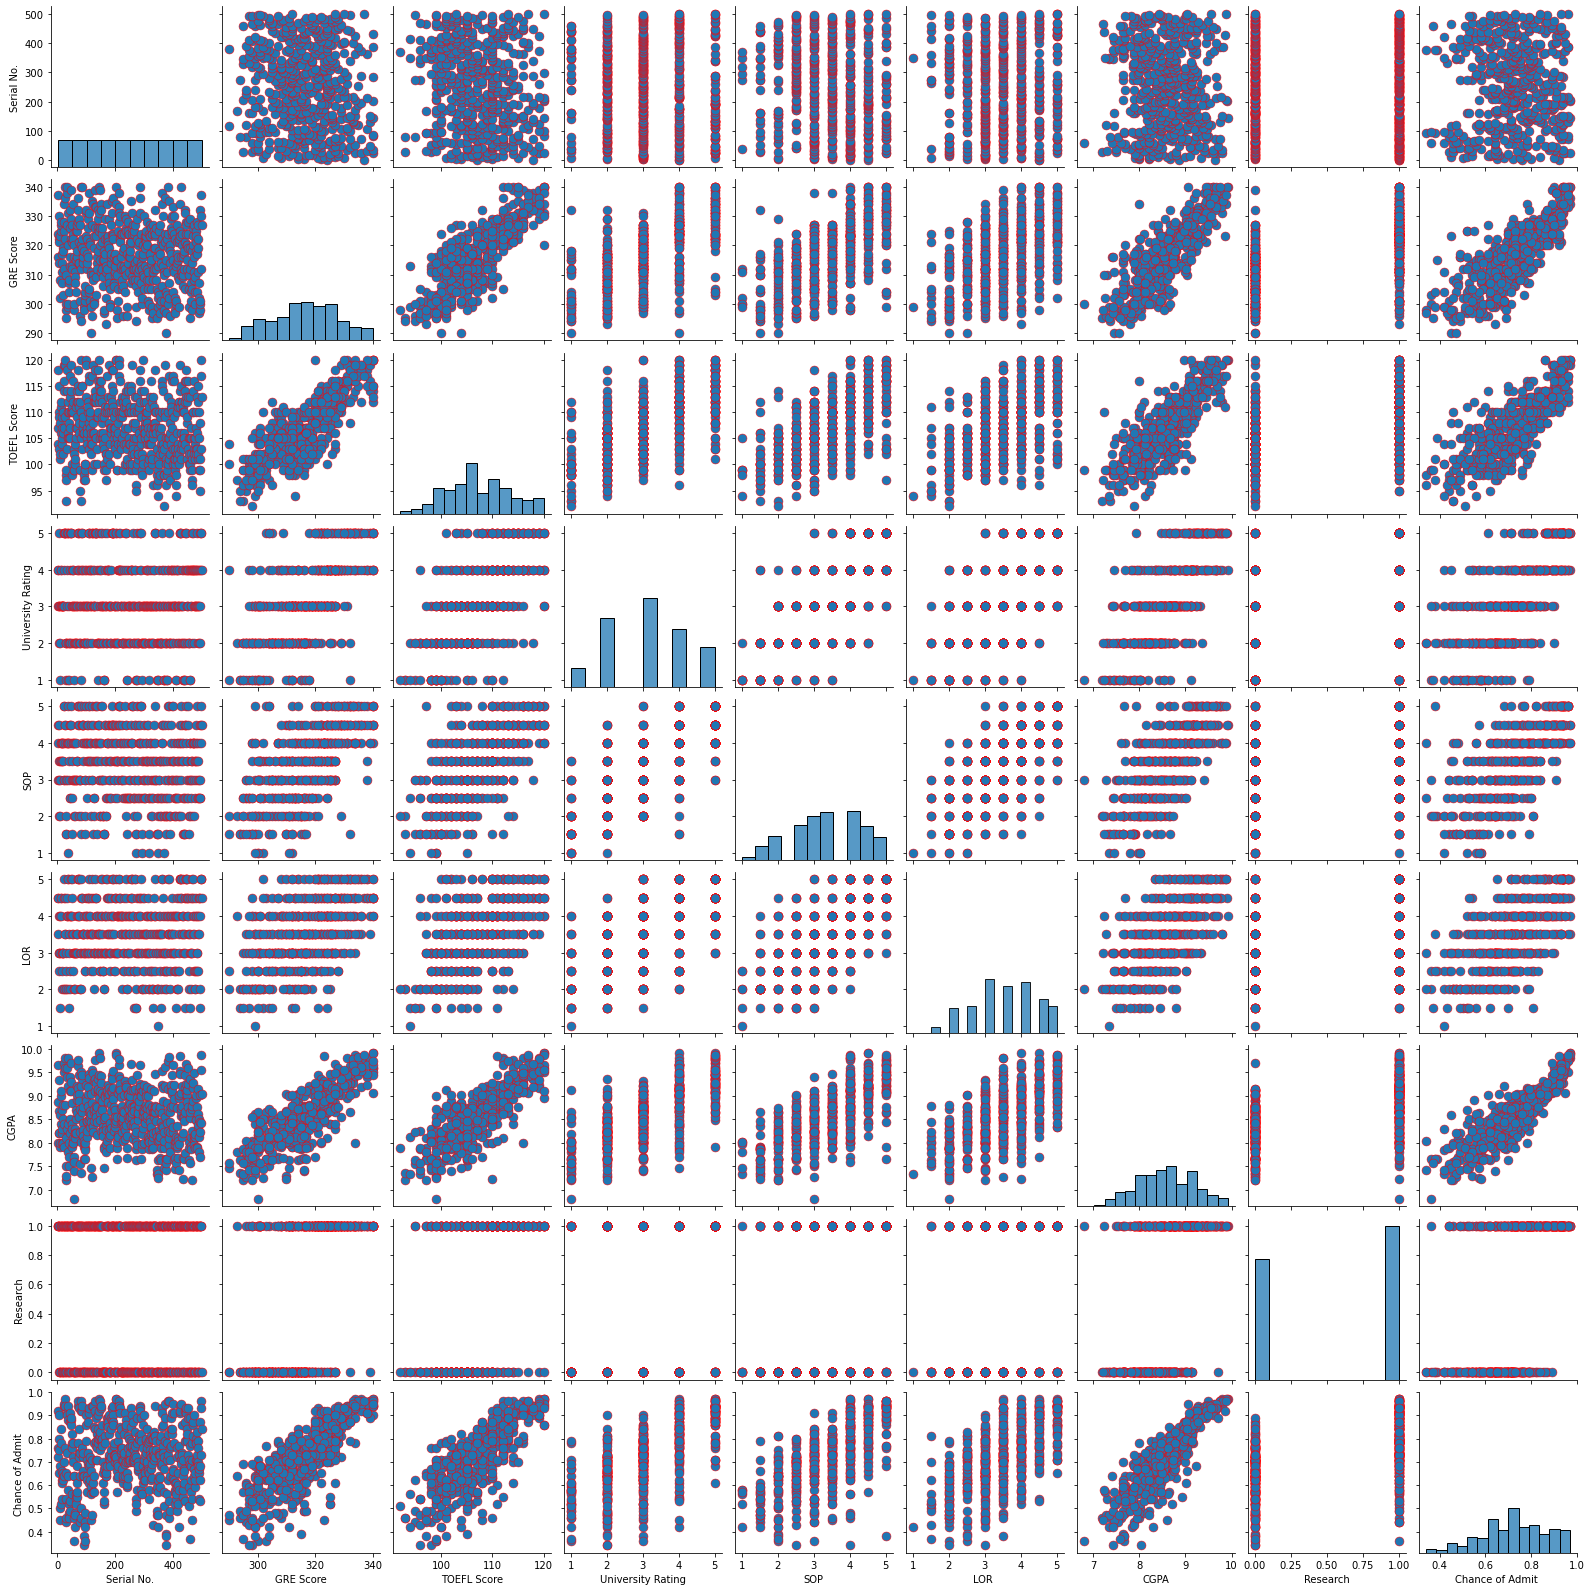

In [14]:
sns.pairplot(df,plot_kws=dict(s=80, edgecolor="red", linewidth=0.5))
# sns.show()
plt.show()

# Find out the minimum and maximum values for GRE score

In [15]:
min_val = df["GRE Score"]. min()
max_val = df["GRE Score"]. max()

In [16]:
print("MINIMUM VALUE OF GRE SCORE:{}".format(min_val))
print("MAXIMUM VALUE OF GRE SCORE:{}".format(max_val))

MINIMUM VALUE OF GRE SCORE:290
MAXIMUM VALUE OF GRE SCORE:340


# Find out the percentage of universities for each university rating

In [17]:
df["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [18]:
a=df['University Rating'].value_counts(normalize=True)*100
a.columns = ['RATINGS', 'PERCENTAGE']
a=pd.DataFrame(a)
a.columns =["percentage of universities"]
a

,percentage of universities
3,32.4
2,25.2
4,21.0
5,14.6
1,6.8


In [19]:
df['perc']=df['University Rating']/df['University Rating'].sum()*100
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,perc
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.256904
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.256904
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.192678
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.192678
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.128452
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,0.321130
496,497,337,117,5,5.0,5.0,9.87,1,0.96,0.321130
497,498,330,120,5,4.5,5.0,9.56,1,0.93,0.321130
498,499,312,103,4,4.0,5.0,8.43,0,0.73,0.256904


# Convert the target variable “Chance of Admit” to categorical having values 0 and 1

In [20]:
df["Chance of Admit "]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [21]:
df.loc[df['Chance of Admit '] <= 0.80, 'Chance of Admit'] = "0"
df.loc[df['Chance of Admit ']>0.80, "Chance of Admit"] = "1"

In [22]:
df=df.drop(['Chance of Admit '],axis=1)

In [23]:
df.shape

(500, 10)

In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,perc,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.256904,1
1,2,324,107,4,4.0,4.5,8.87,1,0.256904,0
2,3,316,104,3,3.0,3.5,8.00,1,0.192678,0
3,4,322,110,3,3.5,2.5,8.67,1,0.192678,0
4,5,314,103,2,2.0,3.0,8.21,0,0.128452,0


# Where 0: Low chance of Admission and 1: High chance of admission in Chance of Admit column

# 

SPLITTING DATA SETS

In [25]:
x=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']

In [26]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'perc'],
      dtype='object')

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. 

In [28]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("ACCURACY USING DECISION TREE:{}".format(score))

ACCURACY USING DECISION TREE:0.95


In [29]:
bi=accuracy_score(y_test,y_pred)*100
bi

95.0

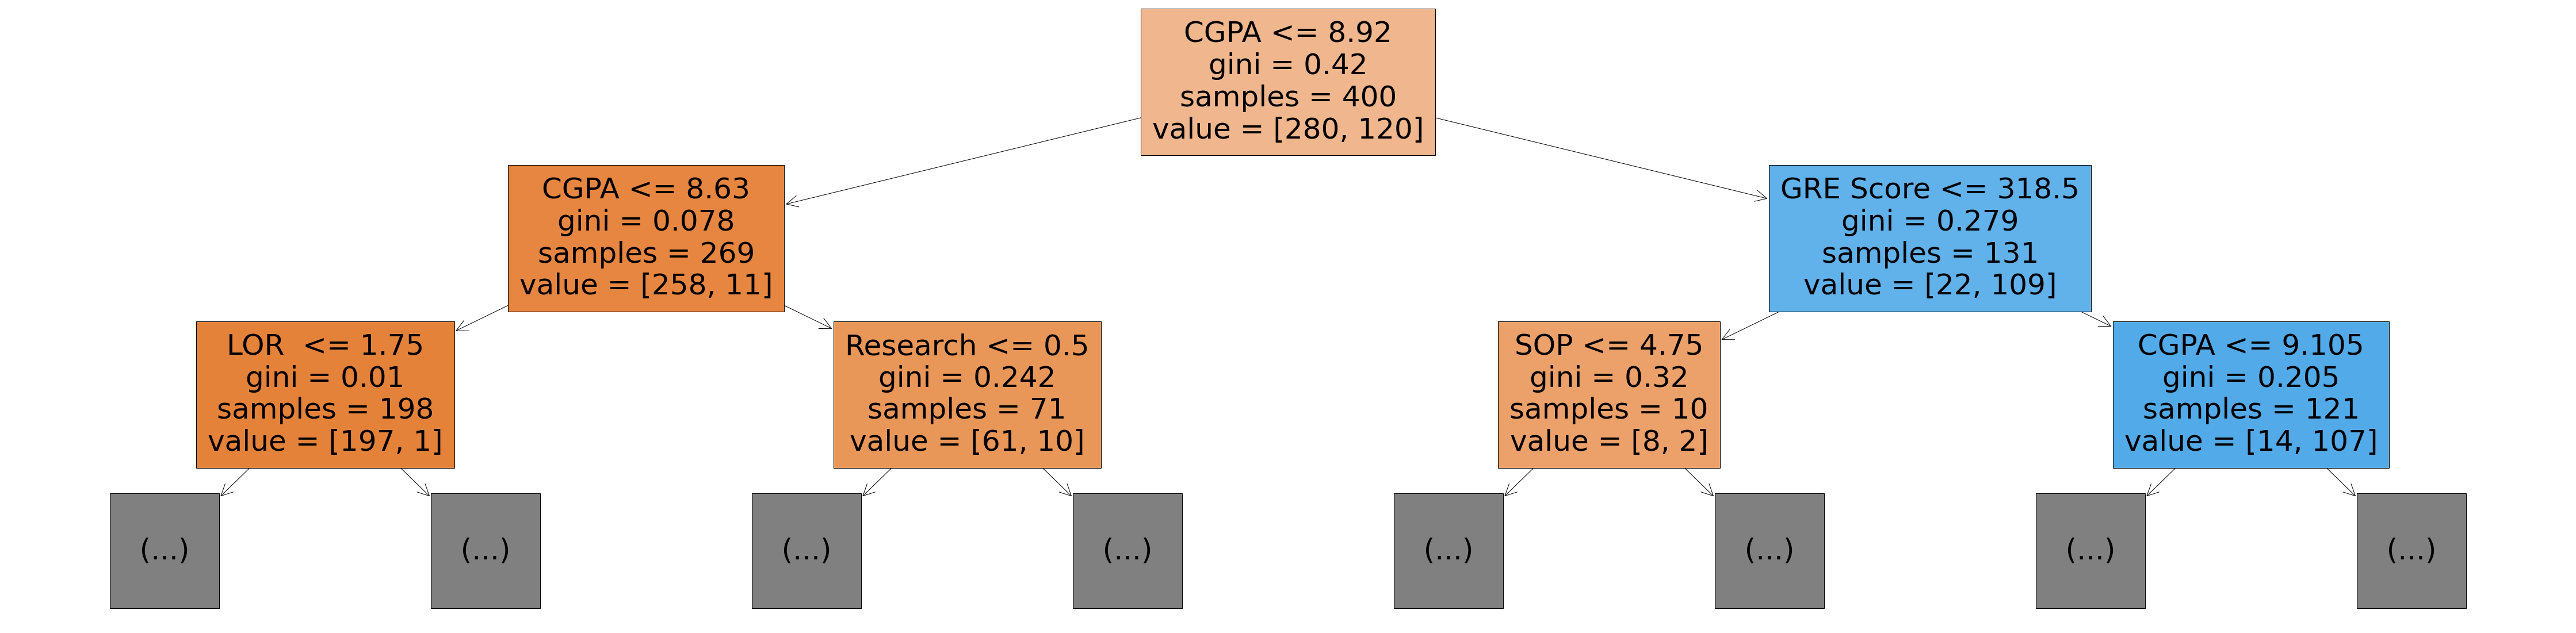

In [30]:
plt.figure(figsize =(80,20))
plot_tree(dec, feature_names=x_train.columns, max_depth=2, filled=True);

In [31]:
confusion_matrix(y_test, y_pred)

array([[75,  3],
       [ 2, 20]], dtype=int64)

# HYPERPARAMETER TUNING USING DECISION TRES

In [32]:
dt = DecisionTreeClassifier(random_state=42)

In [33]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [34]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [35]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [36]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003731,0.003833,0.007806,0.005017,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.88,0.89,0.92,0.91,0.9000,0.015811,41
1,0.002776,0.004333,0.003308,0.003452,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.88,0.89,0.91,0.91,0.8975,0.012990,42
2,0.001358,0.000831,0.001603,0.002777,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.88,0.91,0.91,0.91,0.9025,0.012990,31
3,0.004597,0.007963,0.008883,0.007636,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.88,0.91,0.91,0.91,0.9025,0.012990,31
4,0.001807,0.001652,0.000250,0.000432,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.92,0.92,0.91,0.91,0.9150,0.005000,1


In [37]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4,0.001807,0.001652,0.000250,0.000432,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.92,0.92,0.91,0.91,0.915,0.005,1
9,0.008708,0.005028,0.003025,0.003060,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.92,0.92,0.91,0.91,0.915,0.005,1
14,0.007764,0.005841,0.004843,0.006677,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.92,0.92,0.91,0.91,0.915,0.005,1
19,0.004971,0.004971,0.000000,0.000000,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.92,0.92,0.91,0.91,0.915,0.005,1
24,0.008049,0.008056,0.000537,0.000930,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.92,0.92,0.91,0.91,0.915,0.005,1


In [38]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=42)

In [39]:
print(classification_report(y_test, dt_best.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        78
           1       0.77      0.91      0.83        22

    accuracy                           0.92       100
   macro avg       0.87      0.92      0.89       100
weighted avg       0.93      0.92      0.92       100



In [40]:
score_df.nlargest(1,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4,0.001807,0.001652,0.00025,0.000432,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.92,0.92,0.91,0.91,0.915,0.005,1


# Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

In [41]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [42]:
c=metrics.accuracy_score(y_test, y_pred)*100

# Also using Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.

## BAGGING CLASSIFIER

In [43]:
bm = BaggingClassifier()
bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
y_pred=bag_model.predict(x_test)
print("ACCURACY USING BAGGING CLASSIFIE:",bag_model.score(x_test,y_test))
print("CONFUSSION MATRIX:\n",confusion_matrix(y_test, y_pred)) 
d=bag_model.score(x_test,y_test)*100

ACCURACY USING BAGGING CLASSIFIE: 0.98
CONFUSSION MATRIX:
 [[77  1]
 [ 1 21]]


## SVM USING BAGGING CLASSIFIER

In [44]:
svm = LinearSVC(random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=314)
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=LinearSVC(random_state=42), n_estimators=31,
                  random_state=314)

In [45]:
y_pred=model.predict(x_test)
print("ACCURACY USING BAGGING CLASSIFIE:",model.score(x_test,y_test))
print("CONFUSSION MATRIX:\n",confusion_matrix(y_test, y_pred)) 
e=model.score(x_test,y_test)*100

ACCURACY USING BAGGING CLASSIFIE: 0.91
CONFUSSION MATRIX:
 [[78  0]
 [ 9 13]]


## GRADIENT BOOSTING

In [46]:
grad_boost_clf = GradientBoostingClassifier(
                        n_estimators=600, 
                        learning_rate=0.9, 
                        random_state=40,
                        max_depth=2)
grad_boost_clf.fit(x_train, y_train)
ypred=grad_boost_clf.predict(x_test)
f=accuracy_score(y_test,ypred)*100
print(f)

95.0


### ADA-BOOSTING

In [47]:
AdaModel = AdaBoostClassifier(n_estimators=100,                       learning_rate=1)
model = AdaModel.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
g=metrics.accuracy_score(y_test, y_pred)*100

Accuracy: 0.95


### logisting regression using ada boost

In [48]:
LR=LogisticRegression()
abc =AdaBoostClassifier( base_estimator=LR,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
h=metrics.accuracy_score(y_test, y_pred)*100

Accuracy: 0.97


## VOTING CLASSIFIER

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

log_classifier =  LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()

In [54]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(
    
    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)], 
    voting='hard')

mo=vot_classifier.fit(x_train, y_train)
y_pred =mo.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
gh=accuracy_score(y_test, y_pred)*100
gh

91.0

# ACCURACY OF ALL MODELS

In [55]:
l= {"models":["DecisionTree","RandomForest","BaggingClassifier","SVM USING BAGGING CLASSIFIER","GRADIENT BOOSTING","ADA-BOOSTING","logisting regression using ada boost","voting classifier"],"accuracy":[bi,c,d,e,f,g,h,gh]}
b=pd.DataFrame(l)
b.style.background_gradient(cmap="gist_rainbow")

,models,accuracy
0,DecisionTree,95.000000
1,RandomForest,98.000000
2,BaggingClassifier,98.000000
3,SVM USING BAGGING CLASSIFIER,91.000000
4,GRADIENT BOOSTING,95.000000
5,ADA-BOOSTING,95.000000
6,logisting regression using ada boost,97.000000
7,voting classifier,91.000000


# By doing the all type analysis bagging and random forest both gives good level of accuracy with 98%